In [158]:
import kagglehub
path = kagglehub.dataset_download("hellbuoy/car-price-prediction")

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(f"{path}/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [161]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [162]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [163]:
# We check for duplicate values
df.duplicated().sum()

0

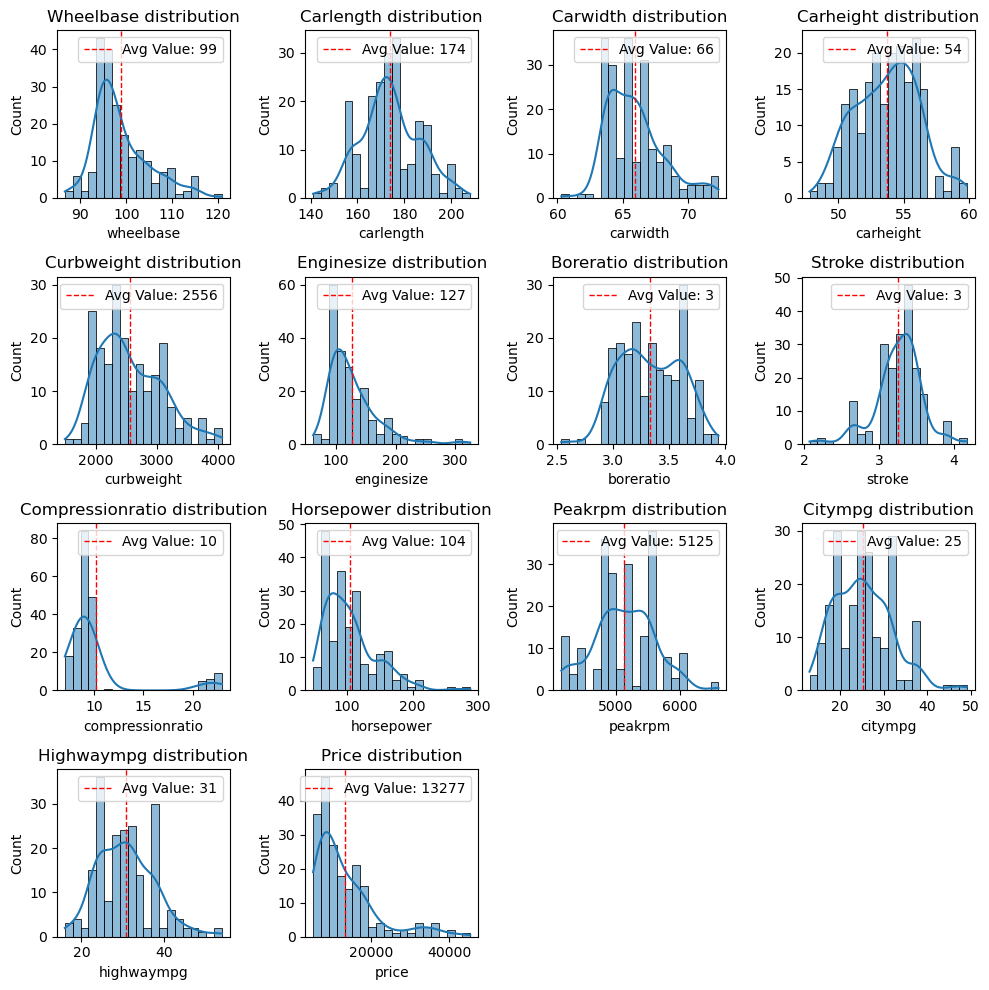

In [164]:
features_histogram = df.select_dtypes(exclude=['object']).drop(['car_ID', 'symboling'],axis=1).columns

plt.figure(figsize=(10, 10))

n_rows = len(features_histogram) // 4 + 1

for i, f in enumerate(features_histogram):
    plt.subplot(n_rows, 4, i + 1)
    sns.histplot(df[f], bins=20, edgecolor="black", kde=True)
    
    avg_value = df[f].mean()
    plt.axvline(avg_value, color='red', linestyle='dashed', linewidth=1, label=f'Avg Value: {avg_value:.0f}')

    plt.title(f'{f.capitalize()} distribution')
    plt.xlabel(f)
    plt.legend()
    
plt.tight_layout()
plt.show()

In [165]:
# Let's look at the columns with data objects to see if they contain valuable information and if we should encode them
object_columns = df.select_dtypes(include=['object']).drop('CarName', axis=1)
object_columns.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi


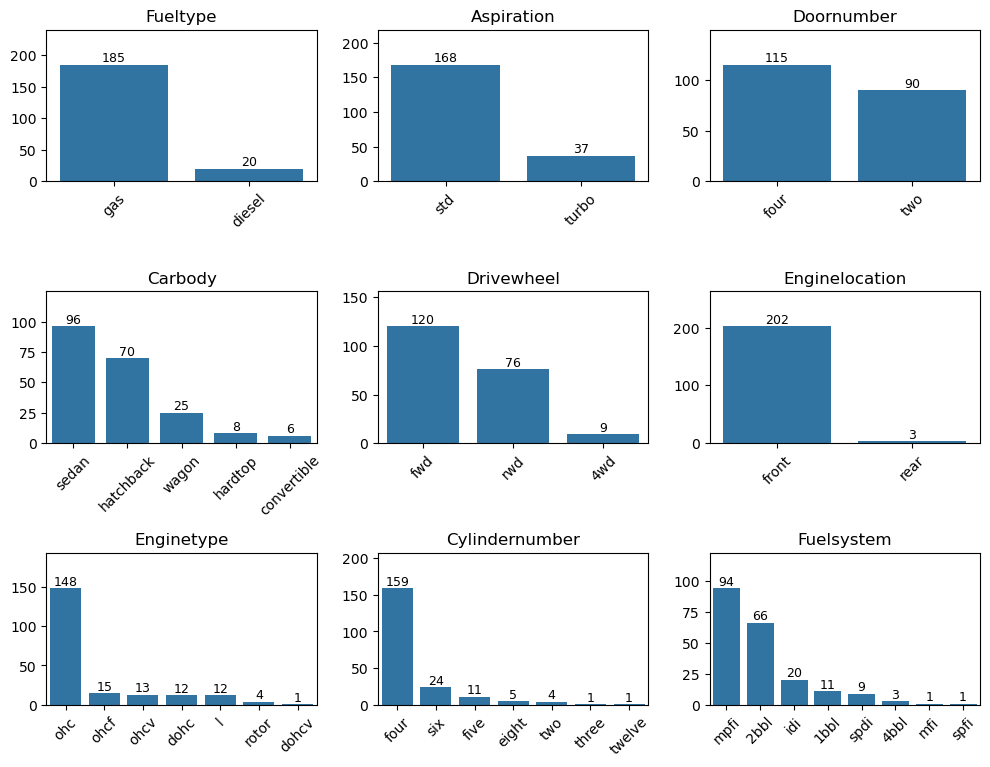

In [166]:
plt.figure(figsize=(10, 180))

rows = len(object_columns) // 3 + 1

for i, c in enumerate(object_columns):
    plt.subplot(rows, 3, i + 1)
    sns.barplot(x=df[c].value_counts().index, y=df[c].value_counts().values)
    plt.title(c.capitalize())
    plt.xlabel('')
    plt.xticks(rotation=45)

    max_value = df[c].value_counts().values.max()
    plt.ylim(0, max_value * 1.3)

    for i, v in enumerate(df[c].value_counts().values):
        plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()

In [167]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for c in object_columns.columns:
    df[c] = le.fit_transform(df[c])
    print(df[c].value_counts())

fueltype
1    185
0     20
Name: count, dtype: int64
aspiration
0    168
1     37
Name: count, dtype: int64
doornumber
0    115
1     90
Name: count, dtype: int64
carbody
3    96
2    70
4    25
1     8
0     6
Name: count, dtype: int64
drivewheel
1    120
2     76
0      9
Name: count, dtype: int64
enginelocation
0    202
1      3
Name: count, dtype: int64
enginetype
3    148
4     15
5     13
0     12
2     12
6      4
1      1
Name: count, dtype: int64
cylindernumber
2    159
3     24
1     11
0      5
6      4
4      1
5      1
Name: count, dtype: int64
fuelsystem
5    94
1    66
3    20
0    11
6     9
2     3
4     1
7     1
Name: count, dtype: int64


In [168]:
# Now that we have encoded the columns with categorical data, let's chechk for correlations
corr_matrix = df.drop(['car_ID', 'symboling', 'CarName',],axis=1).corr().round(2)
corr_matrix

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
fueltype,1.00,-0.40,0.19,-0.15,-0.13,0.04,-0.31,-0.21,-0.23,-0.28,...,-0.07,0.04,-0.05,-0.24,-0.98,0.16,0.48,-0.26,-0.19,-0.11
aspiration,-0.40,1.00,-0.03,0.06,0.07,-0.06,0.26,0.23,0.30,0.09,...,0.11,0.29,0.21,0.22,0.30,0.24,-0.18,-0.20,-0.25,0.18
doornumber,0.19,-0.03,1.00,-0.68,0.10,0.14,-0.45,-0.40,-0.21,-0.55,...,-0.02,0.02,-0.12,0.01,-0.18,0.13,0.25,0.01,0.04,-0.03
carbody,-0.15,0.06,-0.68,1.00,-0.16,-0.28,0.40,0.33,0.13,0.57,...,-0.07,-0.07,0.01,-0.02,0.14,-0.15,-0.11,0.03,-0.01,-0.08
drivewheel,-0.13,0.07,0.10,-0.16,1.00,0.15,0.46,0.49,0.47,-0.02,...,0.52,0.42,0.48,0.07,0.13,0.52,-0.04,-0.45,-0.45,0.58
enginelocation,0.04,-0.06,0.14,-0.28,0.15,1.00,-0.19,-0.05,-0.05,-0.11,...,0.20,0.11,0.19,-0.14,-0.02,0.32,0.20,-0.15,-0.10,0.32
wheelbase,-0.31,0.26,-0.45,0.40,0.46,-0.19,1.00,0.87,0.80,0.59,...,0.57,0.38,0.49,0.16,0.25,0.35,-0.36,-0.47,-0.54,0.58
carlength,-0.21,0.23,-0.40,0.33,0.49,-0.05,0.87,1.00,0.84,0.49,...,0.68,0.56,0.61,0.13,0.16,0.55,-0.29,-0.67,-0.70,0.68
carwidth,-0.23,0.30,-0.21,0.13,0.47,-0.05,0.80,0.84,1.00,0.28,...,0.74,0.52,0.56,0.18,0.18,0.64,-0.22,-0.64,-0.68,0.76
carheight,-0.28,0.09,-0.55,0.57,-0.02,-0.11,0.59,0.49,0.28,1.00,...,0.07,0.02,0.17,-0.06,0.26,-0.11,-0.32,-0.05,-0.11,0.12


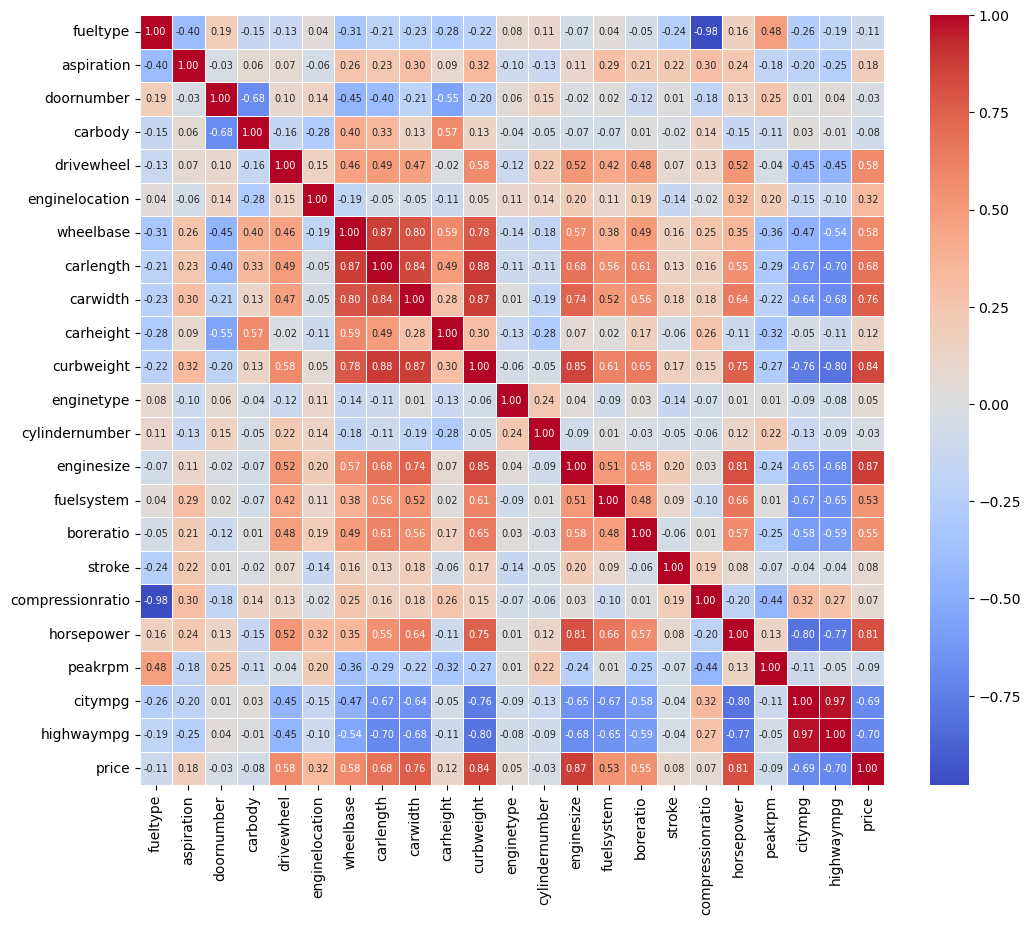

In [169]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 7})
plt.show()

In [170]:
positive_corr_features = corr_matrix[corr_matrix['price']>0.4].index.drop('price')
positive_corr_features

Index(['drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'fuelsystem', 'boreratio', 'horsepower'],
      dtype='object')

In [171]:
negative_corr_features = corr_matrix[corr_matrix['price']<-0.4].index
negative_corr_features

Index(['citympg', 'highwaympg'], dtype='object')

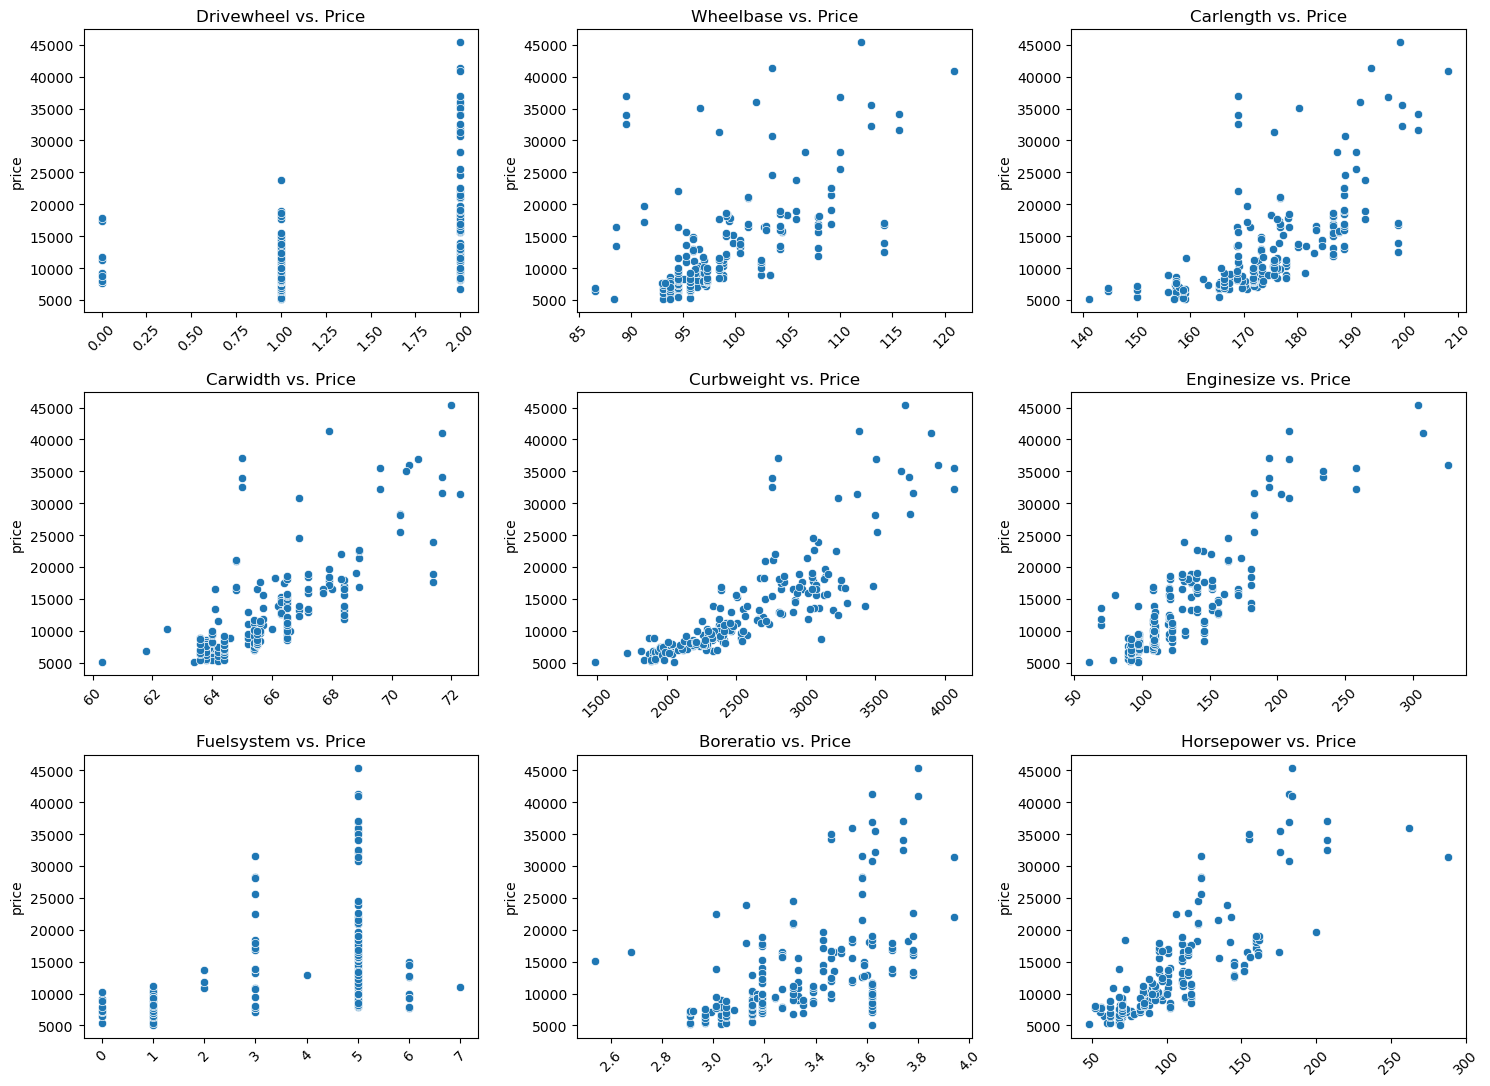

In [172]:
plt.figure(figsize=(15, 250))

rows_2 = len(positive_corr_features) // 3 + 1

for i, c in enumerate(positive_corr_features):
    plt.subplot(rows, 3, i + 1)
    sns.scatterplot(x=df[c], y=df['price'])
    plt.title(f"{c.capitalize()} vs. Price")
    plt.xlabel('')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

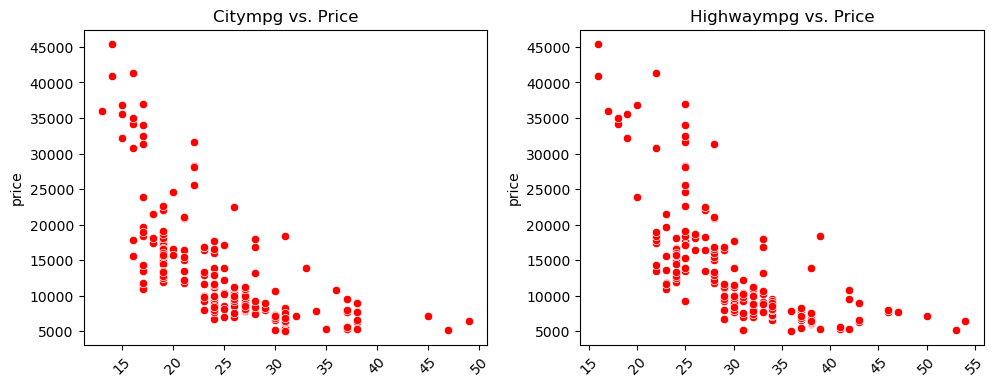

In [173]:
plt.figure(figsize=(15, 250))

rows_2 = len(negative_corr_features) // 3 + 1

for i, c in enumerate(negative_corr_features):
    plt.subplot(rows, 3, i + 1)
    sns.scatterplot(x=df[c], y=df['price'], color = 'red')
    plt.title(f"{c.capitalize()} vs. Price")
    plt.xlabel('')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

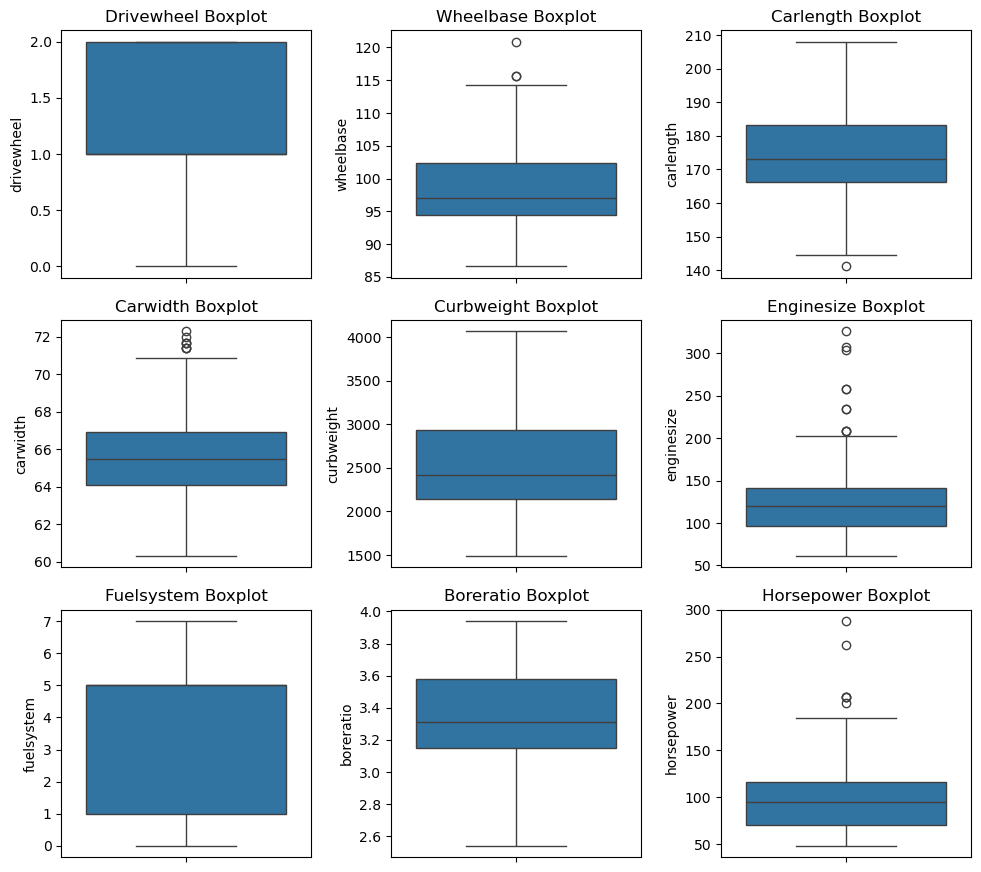

In [174]:
plt.figure(figsize=(10, 200))

rows_2 = len(positive_corr_features) // 3 + 1

for i, c in enumerate(positive_corr_features):
    plt.subplot(rows, 3, i + 1)
    sns.boxplot(y=df[c])
    plt.title(f"{c.capitalize()} Boxplot")
    plt.xlabel('')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

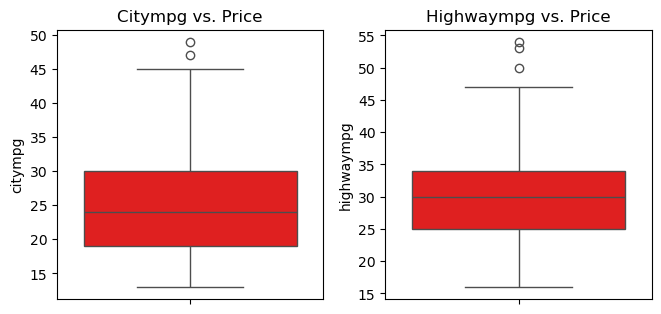

In [175]:
plt.figure(figsize=(10, 200))

rows_2 = len(negative_corr_features) // 3 + 1

for i, c in enumerate(negative_corr_features):
    plt.subplot(rows, 3, i + 1)
    sns.boxplot(y=df[c], color = 'red')
    plt.title(f"{c.capitalize()} vs. Price")
    plt.xlabel('')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [176]:
# We can check the outliers and decide what to do with them

outliers_dict = {}

for c in ['wheelbase', 'carlength', 'carwidth', 'enginesize', 'horsepower', 'citympg', 'highwaympg']:
    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df[c] > (Q3 + 1.5*IQR)) | (df[c] < (Q1 - 1.5*IQR))
    
    outliers_dict[f"{c}"] = df[outliers]

There are some outliers in various columns, but after analysing some of them in detail, we will keep them as they do not appear to be error values or measures.

In [217]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define X and y
X = df.drop(['car_ID', 'symboling', 'CarName','price'], axis=1)
y = df['price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Standard Scaling to avoid features with larger scales dominating others
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}, R²: {r2:.2f}")

Mean Squared Error (MSE): 15927148.54, R²: 0.80


R² measures how well the independent variables explain the variance of the dependent variable. R² = 0.80 means that 80 % of the variance of the target variable is explained by the model, which indicates a good fit.
The mean squared error (MSE) measures the average squared difference between the actual and predicted values. If we calculate the root mean square error (RMSE), we obtain a value o 3990. OOn average, the predicted values deviate from the actual car prices by $3.990. Considering the prices of the cars listed, this is not an acceptable value.

In [180]:
selected_features = list(positive_corr_features) + list(negative_corr_features)
X2 = df[selected_features]
y2 = df['price']

# Train-Test Split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

# Standard Scaling to avoid features with larger scales dominating others
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

# Create the model
model = LinearRegression()
model.fit(X2_train_scaled, y2_train)
y2_pred = model.predict(X2_test_scaled)

# Calculate MSE and R²
mse_2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)

print(f"Mean Squared Error (MSE): {mse_2:.2f}, R²: {r2_2:.2f}")

Mean Squared Error (MSE): 13371849.80, R²: 0.83


We have now only included those features in the linear regression that showed a stronger correlation with the price. This gives us slightly better results:
R² = 0.83, MSE = 13371849.80, RMSE = 3657.75
However, the RMSE is still too high. Let's try other models.

In [228]:
from sklearn.tree import DecisionTreeRegressor

# Create the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state = 42)
dt_model.fit(X2_train_scaled, y2_train)
y2_dt_pred = dt_model.predict(X2_test_scaled)

# Evaluate performance
mse_dt = mean_squared_error(y2_test, y2_dt_pred)
r2_dt = r2_score(y2_test, y2_dt_pred)

print(f"Decision Tree -> MSE: {mse_dt:.2f}, R²: {r2_dt:.2f}")

Decision Tree -> MSE: 7901941.86, R²: 0.90


We have now achieved better results than with linear regression. Let's check it we have overfitting. Overfitting means creating a model that matches (memorizes) the training set so closely that the model fails to make correct predictions on new data. An overfit model is analogous to an invention that performs well in the lab but is worthless in the real world.
To check whether a model is overfitted, we compare R² and MSE of the training set with the test set.

In [230]:
# Predictions on training data
y2_dt_train_pred = dt_model.predict(X2_train_scaled)

# Evaluate training performance
mse_dt_train = mean_squared_error(y2_train, y2_dt_train_pred)
r2_dt_train = r2_score(y2_train, y2_dt_train_pred)

print(f"Decision Tree -> Training MSE: {mse_dt_train:.2f}, Training R²: {r2_dt_train:.2f}")
print(f"Decision Tree -> Test MSE: {mse_dt:.2f}, Test R²: {r2_dt:.2f}")

Decision Tree -> Training MSE: 101988.76, Training R²: 1.00
Decision Tree -> Test MSE: 7901941.86, Test R²: 0.90


A perfect R² (1.00) on the training set means the Decision Tree memorized the training data completely and this is a clear sign of overfitting, because real-world data is never perfectly predictable. To try to reduce overfitting we will use Random Forest.

In [235]:
from sklearn.ensemble import RandomForestRegressor

# Create Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X2_train_scaled, y2_train)

# Predictions
y2_rf_train_pred = rf_model.predict(X2_train_scaled)
y2_rf_pred = rf_model.predict(X2_test_scaled)

# Evaluate performance
mse_rf_train = mean_squared_error(y2_train, y2_rf_train_pred)
r2_rf_train = r2_score(y2_train, y2_rf_train_pred)

mse_rf = mean_squared_error(y2_test, y2_rf_pred)
r2_rf = r2_score(y2_test, y2_rf_pred)

print(f"Random Forest -> Training MSE: {mse_rf_train:.2f}, Training R²: {r2_rf_train:.2f}")
print(f"Random Forest -> Test MSE: {mse_rf:.2f}, Test R²: {r2_rf:.2f}")

Random Forest -> Training MSE: 999154.80, Training R²: 0.98
Random Forest -> Test MSE: 3415882.28, Test R²: 0.96
